## Создание и отображение фигур

## Создание фигур

Фигуру можно описать при помощи:
* словаря;
* создания объекта `Figure`;
* использования интерфейса `plotly.express`.

In [8]:
# описание фигуры при помощи словаря
import plotly
fig_dict = {
    # data хранит список трейсов
    "data": [
        {
            "type": "bar", 
            "x": [1, 2, 3],
            "y": [1, 2, 3]
        }
    ],
    "layout": {
        "title": {
            "text": "Фигура в виде словаря"
        }
    }
}
# для отображения фигуры, описанной словарем, 
# нужно использовать низкоуровневую функцию
# plotly.io.show
plotly.io.show(fig_dict)

In [7]:
# описание фигуры при помощи Figure
import plotly.graph_objects as go

fig = go.Figure(
    # список трейсов
    data = [
        go.Bar(
            x=[1, 2, 3],
            y=[1, 3, 2]
        )
    ],
    # описание фигуры
    layout=go.Layout(
        title='Заголовок изображения'
    )
)
fig.show()

In [9]:
# Можно создать объект класса Figure на основе словаря
fig = go.Figure(fig_dict)
fig.show()

In [34]:
# фигура может состоять из нескольких графиков:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
print(fig)
# видим заготовку под фигуру с двумя наборами осей

# добавляем трейсы при помощи add_trace
# эта функция позволяет последовательно наполнить фигуру
fig.add_trace(
    go.Scatter(
        x=[1, 2, 3],
        y=[4, 2, 1],
        mode="lines",
        # свойство можно задать либо при помощи словаря
        line={
            "color": "green"
        },
        # либо при помощи магических подчеркиваний
        line_color = "green"
    ),
    # указываем, на какой части фигуры изобразить данный график 
    row=1,
    col=1
)
fig.add_trace(
    go.Bar(
        x=[1, 2, 3],
        y=[3, 6, 2],
    ),
    # указываем, на какой части фигуры изобразить данный график 
    row=1,
    col=2
)
fig.show()

Figure({
    'data': [],
    'layout': {'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 0.45]},
               'xaxis2': {'anchor': 'y2', 'domain': [0.55, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]},
               'yaxis2': {'anchor': 'x2', 'domain': [0.0, 1.0]}}
})


In [38]:
# пример выше можно переписать, используя специальные функции `add_x`
fig = make_subplots(rows=1, cols=2)
fig.add_scatter(
    x=[1, 2, 3],
    y=[4, 2, 1],
    mode="lines",
    row=1,
    col=1
)
fig.add_bar(
    x=[1, 2, 3],
    y=[3, 6, 2],
    row=1,
    col=2
)
# для обновления макета можно использовать метод update_layout
fig.update_layout(
    title_text="Заголовок",
    title_font_size=42,
    title_x=.5
)
fig.show()

In [44]:
# после создания трейсов их свойства можно модифицировать 
# при помощи методов update_traces и for_each_trace
fig = make_subplots(rows=1, cols=2)
fig.add_scatter(
    x=[1, 2, 3],
    y=[4, 2, 1],
    mode="lines",
    row=1,
    col=1,
    name="line_trace"
)
fig.add_bar(
    x=[1, 2, 3],
    y=[3, 6, 2],
    row=1,
    col=2,
    name="bar_trace"
)
fig.update_traces(
    line_color='olive',
    selector={
        "type": "scatter"
    }
)
fig.update_traces(
    marker_color='pink',
    row=1,
    col=2
)

fig.show()

Другие методы из семейства update:
* update_xaxes
* update_yaxes
* update_layout_images
* update_annotations
* update_shapes


In [46]:
# кроме этого, изменять свойства можно напрямую, обращаясь к полям объекта
# после создания трейсов их свойства можно модифицировать 
# при помощи методов update_traces и for_each_trace
fig = make_subplots(rows=1, cols=2)
fig.add_scatter(
    x=[1, 2, 3],
    y=[4, 2, 1],
    mode="lines",
    row=1,
    col=1,
    name="line_trace"
)
fig.add_bar(
    x=[1, 2, 3],
    y=[3, 6, 2],
    row=1,
    col=2,
    name="bar_trace"
)
fig.layout.title.text = 'Новый текст'
fig.data[1].marker.line.color = 'black'
fig.data[1].marker.line.width = 4

fig.show()

Фигуры `plotly` поддерживают работу с _темами_. Темы реализуются в виде объектов шаблонов (`Template`). Шаблон, кроме определения собственно стилей может добавлять аннотации, изображения и прочие визуальные элементы на фигуру.   

Можно определять собственные темы. Подробнее см. [здесь](https://plotly.com/python/templates/).

In [47]:
# Список доступных тем:
print(plotly.io.templates)

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']



In [50]:
import plotly.graph_objects as go

fig = go.Figure(
    # список трейсов
    data = [
        go.Bar(
            x=[1, 2, 3],
            y=[1, 3, 2]
        )
    ],
    # описание фигуры
    layout=go.Layout(
        title='Заголовок изображения',
        template='plotly_dark'
    )
)
fig.show()

## Отрисовка фигур


Отобразить фигуру можно одним из следующих способов:
* использовать фреймворк `renderers`;
* использовать `dash`;
* использовать `FigureWidget` в контексте `ipywidgets`;
* экспортировать фигуру в HTML и открыть в браузере;
* отрендерить изображение в виде статичного файла (PNG, JPG, ...) с использованием Kaleido.

In [ ]:
import plotly.graph_objects as go
# 1. Создаем фигуру
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="Первый барплот"
)
# 2. Вызываем метод show
fig.show()

In [ ]:
# можно получить список различных модулей визуализации (renderers)
import plotly.io as pio
pio.renderers
# я работаю в vscode, поэтому Default renderer: 'vscode'

Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

Особенности:
* notebook - хорош для обычный Jupyter Notebook + если нужно будет сохранить результат в отдельный оффлайн файл
* notebook_connected (=kaggle, azure) - то же самое, но подтягивает нужные js скрипты из CDN;
* browser (=firefox, chrome, chromium) - откроет результат в браузере; нужно рабочее ядро python;
* iframe, iframe_connected: сохранит результат в автономный HTML-файл и засунет в iframe (плюс в том, что визуализация хранится в отдельном файле);
* plotly_mimetype (jupyterlab, nteract, vscode): генерирует специальное описание фигуры и просит интерфейс текущего приложения отрисовать его;
* png, jpg, svg - модули визуализации для генерации статичных изображений

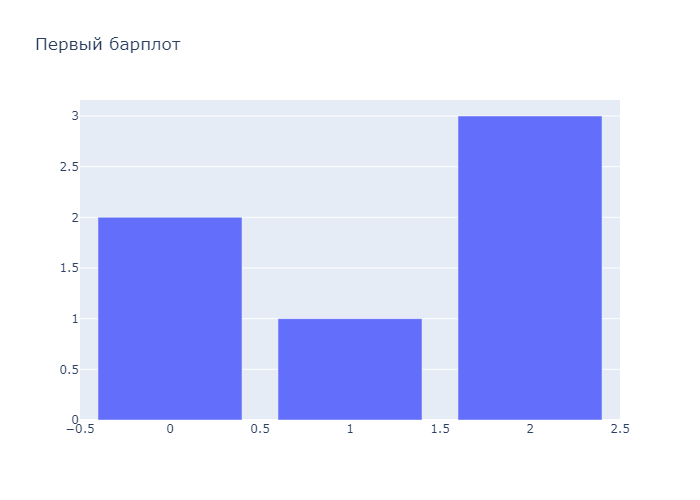

In [ ]:
import plotly.graph_objects as go
# 1. Создаем фигуру
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="Первый барплот"
)
# 2. Вызываем метод show
fig.show(renderer='png') # меняем renderer
# теперь результат - это png, который можно сохранить на диск

In [ ]:
import plotly.graph_objects as go
# 1. Создаем фигуру
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="Первый барплот"
)
# 2. Вызываем метод show
fig.show(renderer='browser') # меняем renderer
# автоматически открывается браузер

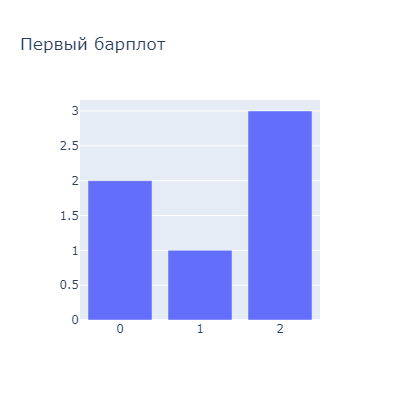

In [ ]:
# настройки отрисовщика можно менять
import plotly.graph_objects as go
# 1. Создаем фигуру
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="Первый барплот"
)
# 2. Вызываем метод show
fig.show(renderer='png', width=400, height=400) # меняем renderer

## Производительность

Общая схема работы: 
1. построение описания фигуры;
2. сериализация в JSON (автоматически, без нашего участия);
3. передача браузеру (или в HTML, или Kaleido).
4. отрисовка браузером.

Советы по ускорению: 
1. для ускорения процесса сериализации больших фигур авторы рекомендуют установить пакет `orjson`;
2. можно попытаться использовать [трейсы, ускоренные за счет WebGL](https://plotly.com/python/webgl-vs-svg/)
3. использовать пакет [Datashader](https://plotly.com/python/datashader/) для рендеринга на стороне питона.

## Сохранение изображений

Plotly поддерживает различные варианты сохранения изображений:
* растровые форматы (png, jpg, ..): `fig.write_image('file.png')`
* векторные форматы (svg, pdf): `fig.write_image('file.svg')`
    * важно: для фигур, содержащих трейсы на основе WebGL, некоторые части изображения будут растровыми

Можно получить представление фигуры в виде байтов при помощи `to_image`. При вызове можно указать:
* размеры;
* масштаб;
* движок для экспорта.

In [57]:
fig = go.Figure()
fig.add_scatter(
    x=[1, 2, 3],
    y=[4, 2, 1],
    mode="lines"
)
img_bytes = fig.to_image(format="png", width=400, height=400)

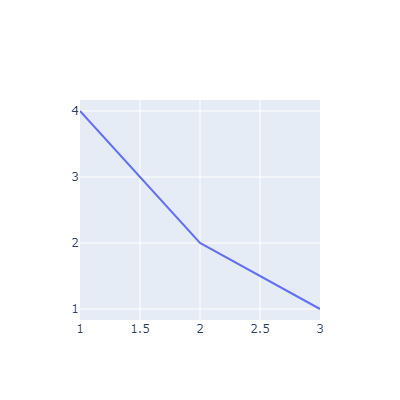

In [58]:
from IPython.display import Image
Image(img_bytes)